In [1]:
import torch
import torchvision
import numpy as np
import d2lzh_pytorch as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [3]:
# 特征向量的宽度 28 * 28 = 784, 有10个类别 
# X -> (batch_size, 784), W -> (784, 10), b -> (1, 10)
num_inputs = 784
num_outputs = 10

W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype=torch.float)
b = torch.zeros(num_outputs, dtype=torch.float)

W.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [4]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim = 1, keepdim = True)  # keepdim = True 意味着，保留行数和列数,依然是一个二维的？
    return X_exp / partition    # broadcast

In [5]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat.gather(1, y.view(-1,1)))    # 以y为索引在y_hat选取值，1代表在第二维方向操作，y.view是为了对应

In [6]:
def net(X):
    # 利用view函数将图像修改为一维向量  
    return softmax(torch.mm(X.view((-1, num_inputs)), W) + b)

In [7]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

In [8]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [9]:
num_epochs, lr = 5, 0.1/256
d2l.train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

epoch 1, loss 0.7862, train acc 0.748, test acc 0.794
epoch 2, loss 0.5709, train acc 0.814, test acc 0.811
epoch 3, loss 0.5256, train acc 0.825, test acc 0.820
epoch 4, loss 0.5012, train acc 0.833, test acc 0.824
epoch 5, loss 0.4851, train acc 0.838, test acc 0.823


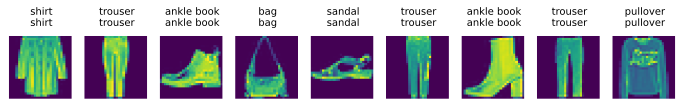

In [12]:
test_iter = iter(test_iter)

X, y =next(test_iter)

true_labels = d2l.get_fashion_mnist_labels(y.numpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9].squeeze(), titles[0:9])